# JEST internal workshop &#8594; Intro to ML (Crash Course)

## Basic info
Version: 0.2 (2021-04-24)  
© Tiago Tamagusko (tamagusko@uc.pt)<br>
License: [LICENSE](https://raw.githubusercontent.com/tamagusko/workshop-intro-ml/main/LICENSE)

## Requirements

- Have a Google account.

## Installation

Go to the [link](https://colab.research.google.com/github/tamagusko/workshop-intro-ml/blob/main/introMLcolab.ipynb) and make a copy.


## Topics

0. A Data Science project
1. Data Collection
2. Exploratory data analysis  
    2.1 Data visualization  
3. Preprocessing  
    3.1 Missing Data, Encoding, Standardizing, Feature Engineering  
    3.2 Split data in train/test
4. Model  
    4.1  Decision Tree  
    4.2. Random Forest  
    4.3. KNN (k-nearest neighbors)  
    4.4. Neural Network (Multilayer perceptron)  
    4.5. XGBoost (eXtreme Gradient Boosting)
5. Comparison of models  
    5.1 Metrics  
    5.2 Receiver Operating Characteristic (ROC)  
6. Improving the model
7. Saving and loading models
---

---
### Machine Learning Methods

1. Supervised Learning (regression and classification)
2. Unsupervised (dimensionality reduction and clustering)
3. Reinforcement (learn from mistakes)

More details in [What are the types of machine learning?](https://towardsdatascience.com/what-are-the-types-of-machine-learning-e2b9e5d1756f)

### Which model should I choose?

[scikit-learn: Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

---

# Practical example: Predicting Pulsar Star

More details in: [Predicting Pulsar Star](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate)

## Proposed problem

Classify stars between Pulsar (1) and non-Pulsar (0).

Note: The data were collected and previously treated.
 
## 1. Data Collection

### Dataset - [pulsar_stars.csv](data/pulsar_stars.csv)

**rows**: 16,259 spurious examples (RFI/noise), and 1,639 real pulsar examples. Total of 17,898 rows.  

**columns**: 9 features, namely:  
  1. Mean of the integrated profile.
  2. Standard deviation of the integrated profile.
  3. Excess kurtosis of the integrated profile.
  4. Skewness of the integrated profile.
  5. Mean of the DM-SNR curve.
  6. Standard deviation of the DM-SNR curve.
  7. Excess kurtosis of the DM-SNR curve.
  8. Skewness of the DM-SNR curve.
  9. Class (1=Pulsar, 0=non-Pulsar)

So, the features are columns 1 to 8, and the label is the column 9.

In [1]:
import pandas as pd

More details in [A Complete Pandas Guide](https://towardsdatascience.com/a-complete-pandas-guide-2dc53c77a002)

In [2]:
url = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part1/master/ProjetoTI/pulsar_stars.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 2. Exploratory data analysis

## 2.1 Data visualization

In [5]:
df.shape

(17898, 9)

In [6]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### View data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Data overview

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


### NA values?

In [9]:
df.isna().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

### Duplicate rows?

In [10]:
print("Duplicate rows: ", df.duplicated().sum())

Duplicate rows:  0


### Target (label) class

In [11]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

<AxesSubplot:ylabel='target_class'>

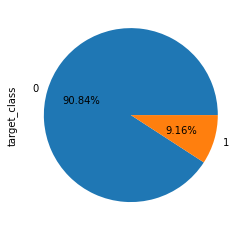

In [12]:
df.target_class.value_counts().plot.pie(autopct='%.2f%%')

### Correlation matrix

In [13]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-13-85e8427fef8b>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.00,0.55,-0.87,-0.74,-0.30,-0.31,0.23,0.14,-0.67
Standard deviation of the integrated profile,0.55,1.00,-0.52,-0.54,0.01,-0.05,0.03,0.03,-0.36
Excess kurtosis of the integrated profile,-0.87,-0.52,1.00,0.95,0.41,0.43,-0.34,-0.21,0.79
Skewness of the integrated profile,-0.74,-0.54,0.95,1.00,0.41,0.42,-0.33,-0.20,0.71
Mean of the DM-SNR curve,-0.30,0.01,0.41,0.41,1.00,0.80,-0.62,-0.35,0.40
Standard deviation of the DM-SNR curve,-0.31,-0.05,0.43,0.42,0.80,1.00,-0.81,-0.58,0.49
Excess kurtosis of the DM-SNR curve,0.23,0.03,-0.34,-0.33,-0.62,-0.81,1.00,0.92,-0.39
Skewness of the DM-SNR curve,0.14,0.03,-0.21,-0.20,-0.35,-0.58,0.92,1.00,-0.26
target_class,-0.67,-0.36,0.79,0.71,0.40,0.49,-0.39,-0.26,1.00


## 3 Preprocessing

### 3.1 Missing Data, Encoding, Standardizing, Feature Engineering

Look in: [freecodecamp: Preprocessing](https://www.youtube.com/watch?v=0B5eIE_1vpU&t=2076s) (not necessary in this dataset)

### 3.2 Split data in train/test

In [14]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [15]:
from sklearn.model_selection import train_test_split

# 50/50 (common: 70/30 or 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8949, 8), (8949, 8), (8949,), (8949,))

## 4. Models

## How to use Scikit-Learn?

By [Andre Ye](https://www.linkedin.com/in/andre-ye-501746150/), in KDnuggets:[The Ultimate Scikit-Learn Machine Learning Cheatsheet](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html).

```python
# import
from sklearn.BRANCH import MODEL_NAME
from sklearn.metrics import METRIC_NAME

# Build
MODEL = MODEL_NAME()

# train
MODEL.fit(X_train, y_train)

# predict
y_pred_MODEL = MODEL.predict(X_test)

# eval 
METRIC = METRIC_NAME((y_test, y_pred_MODEL)) 
```

### 4.1 Decision Tree

See the parameters in: [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

More details in: [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

How to tune the parameters: [InDepth: Parameter tuning for Decision Tree](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Building (need to tune for better results)
DT = DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
# Training 
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
# Predict
y_pred_DT = DT.predict(X_test)

In [19]:
# Evaluating
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

*Confusion Matrix:*
\begin{pmatrix} 
True Negative & False Positive\\
False Negative & True Positive
\end{pmatrix} 

\begin{equation}
Accuracy = \frac{TP+TN}{(TP+TN+FP+FN)} \\
F1 = \frac{2*TP}{(2*TP+FP+FN)} \\
MCC = \frac{TP*TN-FP*FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} \\
\end{equation}

*where:*

*TP = True Positive  
TN = True Negative  
FP = False Positive  
FN = False Negative* 

In [20]:
DT_accuracy = accuracy_score(y_test, y_pred_DT)
DT_f1 = f1_score(y_test, y_pred_DT, average='weighted')
# best metric for binary (0/1) classification 
DT_mcc = matthews_corrcoef(y_test, y_pred_DT) 

print('DT Model performance')
print('----------------------')
print(f'- Accuracy: {DT_accuracy:0.3f}')
print(f'- F1 score: {DT_f1:0.3f}')
print(f'- MCC: {DT_mcc:0.3f}')
print('----------------------')

DT Model performance
----------------------
- Accuracy: 0.978
- F1 score: 0.978
- MCC: 0.868
----------------------


### Trick (worst possible threshold)

In [21]:
# Bad practice (don't do it)
import warnings
warnings.filterwarnings('ignore')

In [22]:
threshold = [0] * len(X_test)  # All results equal to 0

threshold_accuracy = accuracy_score(y_test, threshold)
threshold_f1 = f1_score(y_test, threshold, average='weighted')
threshold_mcc = matthews_corrcoef(y_test, threshold)

print('DT Model performance ')
print('----------------------')
print(f'- Accuracy: {threshold_accuracy:0.3f}')
print(f'- F1 score: {threshold_f1:0.3f}')
print(f'- MCC: {threshold_mcc:0.3f}')
print('----------------------')

DT Model performance 
----------------------
- Accuracy: 0.908
- F1 score: 0.865
- MCC: 0.000
----------------------


In [23]:
# Feature Importance

featureImportanceDT = pd.DataFrame({'Feature': list(X_train.columns),
                                  'Importance': DT.feature_importances_}).\
    sort_values('Importance', ascending=False)

featureImportanceDT

,Feature,Importance
2,Excess kurtosis of the integrated profile,0.972950
5,Standard deviation of the DM-SNR curve,0.019431
0,Mean of the integrated profile,0.006398
1,Standard deviation of the integrated profile,0.001221
3,Skewness of the integrated profile,0.000000
4,Mean of the DM-SNR curve,0.000000
6,Excess kurtosis of the DM-SNR curve,0.000000
7,Skewness of the DM-SNR curve,0.000000


### 4.2 Random Forest

See the parameters in: [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

More details in: [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

How to tune the parameters: [Random Forest: Hyperparameters and how to fine-tune them](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Building (need to tune for better results)
RF = RandomForestClassifier(max_depth=4, random_state=42)

# Training 
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [25]:
# Predict
y_pred_RF = RF.predict(X_test)

In [26]:
# Evaluating
RF_accuracy = accuracy_score(y_test, y_pred_RF)
RF_f1 = f1_score(y_test, y_pred_RF, average='weighted')
# best metric for binary (0/1) classification 
RF_mcc = matthews_corrcoef(y_test, y_pred_RF) 

print('RF Model performance')
print('----------------------')
print(f'- Accuracy: {RF_accuracy:0.3f}')
print(f'- F1 score: {RF_f1:0.3f}')
print(f'- MCC: {RF_mcc:0.3f}')
print('----------------------')

RF Model performance
----------------------
- Accuracy: 0.979
- F1 score: 0.979
- MCC: 0.870
----------------------


In [27]:
# Feature Importance
featureImportanceRF = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': RF.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceRF

,feature,importance
2,Excess kurtosis of the integrated profile,0.410166
3,Skewness of the integrated profile,0.215174
0,Mean of the integrated profile,0.176768
4,Mean of the DM-SNR curve,0.059261
5,Standard deviation of the DM-SNR curve,0.054170
1,Standard deviation of the integrated profile,0.033804
7,Skewness of the DM-SNR curve,0.030396
6,Excess kurtosis of the DM-SNR curve,0.020261


### 4.3 K Nearest Neighbors (KNN)

See the parameters in: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

More details in: [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Building
KNN = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# Training 
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [29]:
# Predict
y_pred_KNN = KNN.predict(X_test)

In [30]:
# Evaluating
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
KNN_f1 = f1_score(y_test, y_pred_KNN, average='weighted')
# best metric for binary (0/1) classification 
KNN_mcc = matthews_corrcoef(y_test, y_pred_KNN) 

print('KNN Model performance')
print('----------------------')
print(f'- Accuracy: {KNN_accuracy:0.3f}')
print(f'- F1 score: {KNN_f1:0.3f}')
print(f'- MCC: {KNN_mcc:0.3f}')
print('----------------------')

KNN Model performance
----------------------
- Accuracy: 0.970
- F1 score: 0.968
- MCC: 0.805
----------------------


### 4.4 Neural Network: Multi-Layer Perceptron (MLP)

See the parameters in: [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

More details in: [Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [31]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(alpha=1, max_iter=1000)

# Training 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [32]:
# Predict
y_pred_MLP = MLP.predict(X_test)

In [33]:
# Evaluating
MLP_accuracy = accuracy_score(y_test, y_pred_MLP)
MLP_f1 = f1_score(y_test, y_pred_MLP, average='weighted')
# best metric for binary (0/1) classification 
MLP_mcc = matthews_corrcoef(y_test, y_pred_MLP) 

print('MLP Model performance')
print('----------------------')
print(f'- Accuracy: {MLP_accuracy:0.3f}')
print(f'- F1 score: {MLP_f1:0.3f}')
print(f'- MCC: {MLP_mcc:0.3f}')
print('----------------------')

MLP Model performance
----------------------
- Accuracy: 0.972
- F1 score: 0.970
- MCC: 0.818
----------------------


### 4.5 XGBoost (Ensemble model)

See the parameters in: [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

More details in: [Getting Started with XGBoost in scikit-learn](https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97)

* XGBoost is regularized (avoid overfit).
* XGBoost Have hyperparameters to handle imbalanced data and null values.
* Combine some of the best practices and algorithms in a single model.
* Fast and easy to use.
* It is my go-to algorithm for dealing with structured data.

In [34]:
import xgboost as xgb

# Building (need to tune for better results)
XGB = xgb.XGBClassifier(max_depth=4, random_state=42)

# Training 
XGB.fit(X_train, y_train)

[14:54:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# Predict
y_pred_XGB = XGB.predict(X_test)

In [36]:
# Evaluating
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
XGB_f1 = f1_score(y_test, y_pred_XGB, average='weighted')
# best metric for binary (0/1) classification 
XGB_mcc = matthews_corrcoef(y_test, y_pred_XGB) 

print('XGB Model performance')
print('----------------------')
print(f'- Accuracy: {XGB_accuracy:0.3f}')
print(f'- F1 score: {XGB_f1:0.3f}')
print(f'- MCC: {XGB_mcc:0.3f}')
print('----------------------')

XGB Model performance
----------------------
- Accuracy: 0.979
- F1 score: 0.978
- MCC: 0.868
----------------------


In [37]:
# Feature Importance
featureImportanceXGB = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': XGB.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceXGB

,feature,importance
2,Excess kurtosis of the integrated profile,0.705079
5,Standard deviation of the DM-SNR curve,0.066338
1,Standard deviation of the integrated profile,0.043162
6,Excess kurtosis of the DM-SNR curve,0.040389
0,Mean of the integrated profile,0.038011
3,Skewness of the integrated profile,0.037221
4,Mean of the DM-SNR curve,0.035053
7,Skewness of the DM-SNR curve,0.034746


## 5. Comparison of models

### 5.1 Metrics

In [38]:
results_accuracy = {
    'Threshold': threshold_accuracy,
    'DT': DT_accuracy,
    'RF': RF_accuracy,
    'KNN': KNN_accuracy,
    'MLP': MLP_accuracy,
    'XGB': XGB_accuracy,
    
}
results_f1 = {
    'Threshold': threshold_f1,
    'DT': DT_f1,
    'RF': RF_f1,
    'KNN': KNN_f1,
    'MLP': MLP_f1,
    'XGB': XGB_f1,
}
results_mcc = {
    'Threshold': threshold_mcc,
    'DT': DT_mcc,
    'RF': RF_mcc,
    'KNN': KNN_mcc,
    'MLP': MLP_mcc,
    'XGB': XGB_mcc,
}

acc_df = pd.DataFrame.from_dict(results_accuracy, orient='index', columns=['Accuracy'])
f1_df = pd.DataFrame.from_dict(results_f1, orient='index', columns=['F1'])
mcc_df = pd.DataFrame.from_dict(results_mcc, orient='index', columns=['MCC'])
results = pd.concat([acc_df, f1_df, mcc_df], axis=1)
results

,Accuracy,F1,MCC
Threshold,0.908481,0.864916,0.000000
DT,0.978322,0.978176,0.868007
RF,0.979104,0.978599,0.869823
KNN,0.969606,0.967917,0.804520
MLP,0.971729,0.969735,0.818279
XGB,0.978657,0.978309,0.868180


### 5.2 Receiver Operating Characteristic (ROC)

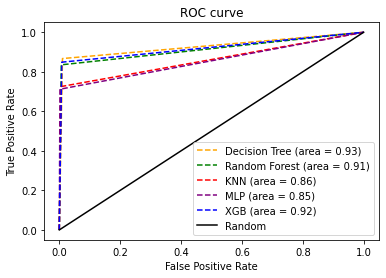

In [39]:
import matplotlib.pyplot as plt

fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_DT)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_RF)
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_KNN)
fpr_MLP, tpr_MLP, _ = roc_curve(y_test, y_pred_MLP)
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_pred_XGB)
roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_RF = auc(fpr_RF, tpr_RF)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB) 

plt.plot(fpr_DT, 
         tpr_DT,
         color='orange',
         linestyle='--',
         label=f'Decision Tree (area = {roc_auc_DT:0.2f})')
plt.plot(fpr_RF, 
         tpr_RF,
         color='green',
         linestyle='--',
         label=f'Random Forest (area = {roc_auc_RF:0.2f})')
plt.plot(fpr_KNN, 
         tpr_KNN,
         color='red',
         linestyle='--',
         label=f'KNN (area = {roc_auc_KNN:0.2f})')
plt.plot(fpr_MLP, 
         tpr_MLP,
         color='purple',
         linestyle='--',
         label=f'MLP (area = {roc_auc_MLP:0.2f})')
plt.plot(fpr_XGB, 
         tpr_XGB,
         color='blue',
         linestyle='--',
         label=f'XGB (area = {roc_auc_XGB:0.2f})')
# plt.plot([0,0,1,1],[0,1,1,1],color='blue',label='Perfect')
plt.plot([0, 1], [0, 1], color='black', linestyle='-', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

More details in [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) and [Entenda o que é AUC e ROC nos modelos de Machine Learning](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

## 6. Improving the model

What can we do better?

In [40]:
from sklearn.model_selection import GridSearchCV
# Try possible combinations of the parameters and find the best ones.

from sklearn.model_selection import RandomizedSearchCV
# Random search for the best parameters (slow and computationally intensive).

from sklearn.ensemble import StackingClassifier
# Combine algorithms and make a hybrid model.

More details in [Machine Learning: GridSearchCV & RandomizedSearchCV](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10) and [Stacking made easy with Sklearn](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b).

## 7. Save Model (doesn't work in the colab env)

```python
import pickle
import datetime

current_date: str = datetime.date.today().strftime("%Y-%m-%d")
    
# save models
filename_DT = f'models/{current_date}_Pulsar_DT.mlmodel'
pickle.dump(DT, open(filename_DT, 'wb'))

filename_RF = f'models/{current_date}_Pulsar_RF.mlmodel'
pickle.dump(RF, open(filename_RF, 'wb'))

filename_KNN = f'models/{current_date}_Pulsar_KNN.mlmodel'
pickle.dump(KNN, open(filename_KNN, 'wb'))

filename_MLP = f'models/{current_date}_Pulsar_MLP.mlmodel'
pickle.dump(MLP, open(filename_MLP, 'wb'))

filename_XGB = f'models/{current_date}_Pulsar_XGB.mlmodel'
pickle.dump(XGB, open(filename_XGB, 'wb'))
```

## 7.1 Load model (doesn't work in the colab env)

```python
loaded_model = pickle.load(open(filename_RF, 'rb'))

# In real life you will use data from the production pipeline.
result = loaded_model.score(X_test, y_test)

print(f'Random Forest: {result:0.3f}')
```